## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [15]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x  = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y =  keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units =  10, num_neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(x_train.shape[1:], 10, [512,256,128, 64, 32])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 1024/50000 [..............................] - ETA: 1:43 - loss: 2.3795 - accuracy: 0.1035

D:\tool\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.387215). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 21s 415us/step - loss: 2.0055 - accuracy: 0.2610 - val_loss: 1.8292 - val_accuracy: 0.3380
Epoch 2/100
50000/50000 [==============================] - 19s 381us/step - loss: 1.7750 - accuracy: 0.3577 - val_loss: 1.6861 - val_accuracy: 0.3951
Epoch 3/100
50000/50000 [==============================] - 19s 376us/step - loss: 1.6651 - accuracy: 0.4016 - val_loss: 1.6576 - val_accuracy: 0.4045
Epoch 4/100
50000/50000 [==============================] - 18s 364us/step - loss: 1.5965 - accuracy: 0.4267 - val_loss: 1.5690 - val_accuracy: 0.4400
Epoch 5/100
50000/50000 [==============================] - 18s 361us/step - loss: 1.5428 - accuracy: 0.4472 - val_loss: 1.5808 - val_accuracy: 0.4387
Epoch 6/100
50000/50000 [==============================] - 19s 371us/step - loss: 1.5048 - accuracy: 0.4627 - val_loss: 1.4971 - val_accuracy: 0.4681
Epoch 7/100
50000/50000 [==============================] - 18s 352us/step - loss: 1.4685 - accuracy: 0.4744 - va

50000/50000 [==============================] - 17s 349us/step - loss: 0.5864 - accuracy: 0.7909 - val_loss: 1.9458 - val_accuracy: 0.5098
Epoch 56/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.5884 - accuracy: 0.7884 - val_loss: 2.0225 - val_accuracy: 0.5151
Epoch 57/100
50000/50000 [==============================] - 18s 356us/step - loss: 0.5815 - accuracy: 0.7912 - val_loss: 2.0307 - val_accuracy: 0.5080
Epoch 58/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.5572 - accuracy: 0.8014 - val_loss: 2.0366 - val_accuracy: 0.5200
Epoch 59/100
50000/50000 [==============================] - 18s 369us/step - loss: 0.5510 - accuracy: 0.8028 - val_loss: 2.0300 - val_accuracy: 0.5163
Epoch 60/100
50000/50000 [==============================] - 18s 360us/step - loss: 0.5410 - accuracy: 0.8057 - val_loss: 2.0927 - val_accuracy: 0.5135
Epoch 61/100
50000/50000 [==============================] - 18s 361us/step - loss: 0.5268 - accuracy: 0.810

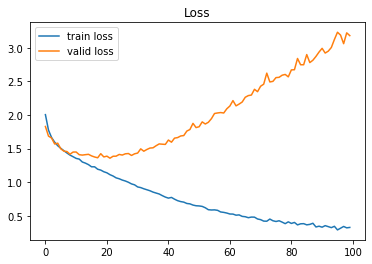

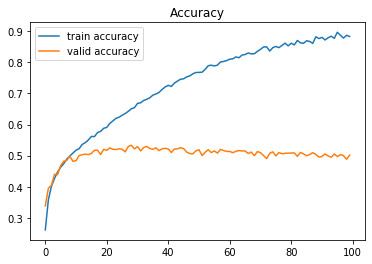

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()